# Task 3 - 29 May 2025

# **Linear Regression**

### *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


### *Loading Dataset*

In [19]:
df = pd.read_csv("Housing.csv") 
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### *Inspecting Dataset*

In [18]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             527 non-null    int64  
 1   area              527 non-null    int64  
 2   bedrooms          527 non-null    int64  
 3   bathrooms         527 non-null    int64  
 4   stories           527 non-null    int64  
 5   mainroad          527 non-null    object 
 6   guestroom         527 non-null    object 
 7   basement          527 non-null    object 
 8   hotwaterheating   527 non-null    object 
 9   airconditioning   527 non-null    object 
 10  parking           527 non-null    int64  
 11  prefarea          527 non-null    object 
 12  furnishingstatus  0 non-null      float64
dtypes: float64(1), int64(6), object(6)
memory usage: 57.6+ KB


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
count,5.270000e+02,527.000000,527.000000,527.000000,527.000000,527.000000,0.0
mean,4.719845e+06,4919.083491,2.963947,1.286528,1.815939,0.679317,NaN
std,1.858934e+06,1772.839270,0.735203,0.500445,0.873290,0.861960,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,3.430000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000,NaN
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000,NaN
75%,5.696250e+06,6100.000000,3.000000,2.000000,2.000000,1.000000,NaN
max,1.330000e+07,9960.000000,6.000000,4.000000,4.000000,3.000000,NaN


### *Checking for Null Values*

In [20]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### *Detecting Outliers with Boxplots*

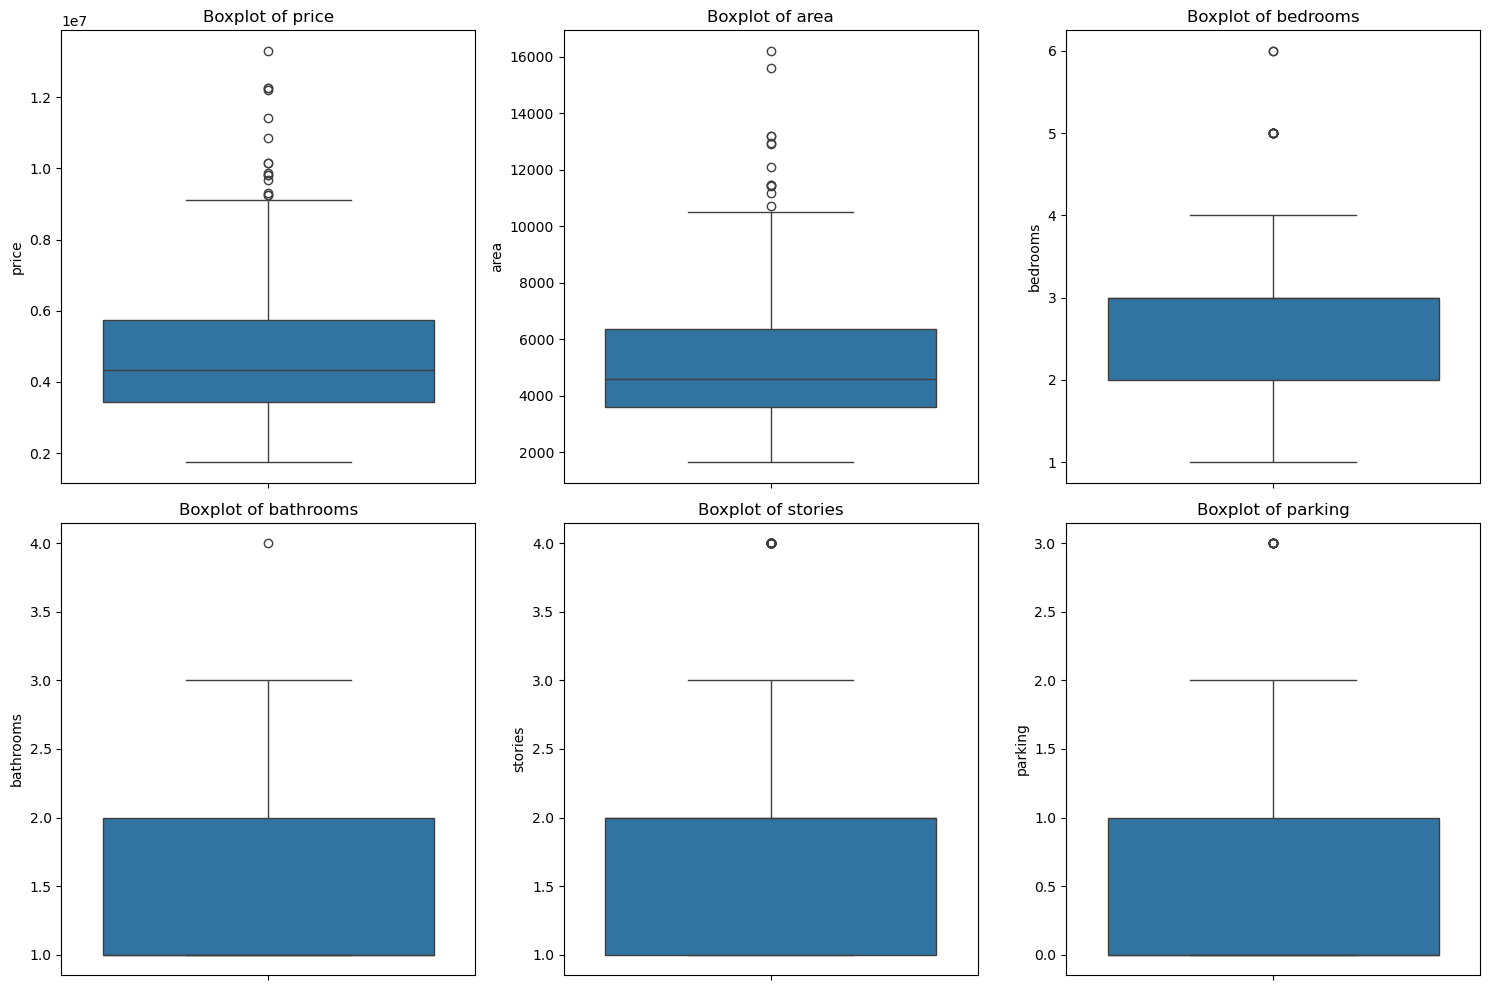

In [24]:
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### *Cleaning and Encoding the data*

In [27]:
df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

df.drop_duplicates(inplace=True)


df = df[df['area'] < 10000]


### *Feature Selection*

In [28]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']


### *Feature Scaling*

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### *Train-Test Split*

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


### *Training Linear Regression Model*

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### *Predicting & Evaluating*

In [14]:
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: ₹{mae:.2f}")
print(f"MSE: ₹{mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: ₹1074591.83
MSE: ₹2138694802865.77
R² Score: 0.57


### *Ploting Actual vs Predicted*

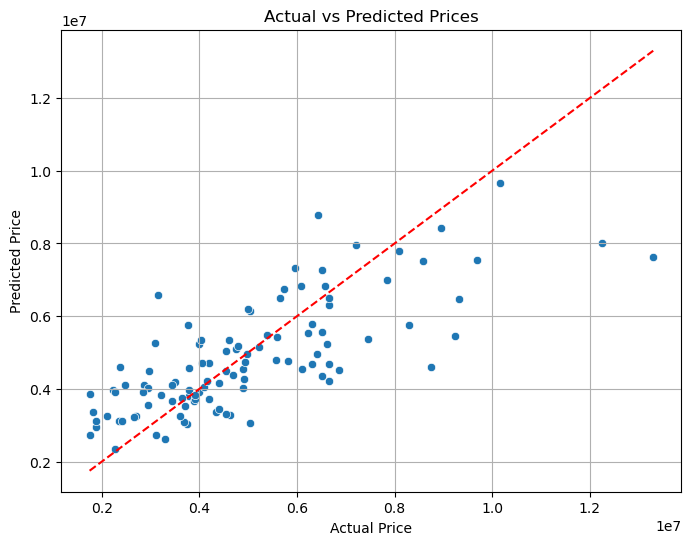

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


### *Showing Model Coefficients*

In [16]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coeff_df


,Feature,Coefficient
0,area,746097.191189
1,bedrooms,114797.532447
2,bathrooms,518873.359851
3,stories,447809.244647
4,parking,233476.996913


### *Predict Price for a Custom House*

In [17]:
# Custom house input: [area, bedrooms, bathrooms, stories, parking]
new_house = pd.DataFrame([[4000, 4, 3, 2, 2]], columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

# Scale input
new_house_scaled = scaler.transform(new_house)

# Predict
predicted_price = model.predict(new_house_scaled)
print(f"Predicted Price for the New House: ₹{predicted_price[0]:,.2f}")


Predicted Price for the New House: ₹6,701,292.24
